# **House Prices Example**

based on https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos
### ** Problem: How much does a house cost? What makes it that expensive?**
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## **Topics:**
### **1. [Load your Libraries](#section1)**
### **2. [Navigating with Pandas](#section2)**
### **3. [Cleaning your data](#section3)**
### **4. [Feature Engineering](#section4)**
### **5. [Model Prep: train, test and split](#section5)**
### **6. [Modeling: Linear Regression, Random Forests](#section6)**
### **7. [Hyperparameter Optimization](#section7)**

<a id='section1'></a>
# **1. Load Your Data, Load your Libraries**

<img src='https://ak8.picdn.net/shutterstock/videos/17983978/thumb/7.jpg' style='width:300px'/>

In [0]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

#prep
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, QuantileTransformer

#models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#validation libraries
from sklearn.model_selection import KFold, StratifiedKFold
from IPython.display import display
from sklearn import metrics


%matplotlib inline

<a id='section2'></a>
# **2. Navigating your data**

<img src='https://www.eurisy.org/data_files/mce_images/Blog_images/Human_hand_with_a_laptop_surrounded_by_iconsellagrin.jpg' style='width:400px' />


### **load the dataset from CSV file to pandas dataframes**
 data frames have a lot of great functionality for manipulating data. These can also be thought of as super powerful excel sheets. 

In [4]:
train_df = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

FileNotFoundError: ignored

In [0]:
### **Overview of the dataset**

In [1]:
sample = train_df.sample(6)
sample[['SalePrice','Neighborhood','YearBuilt','LotArea']]

NameError: ignored

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

each house has a number of properties that could affect its price. e.g. location, year built, size,..etc

In [0]:
sample

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1008,1009,20,RL,43.0,12118,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,7,5,2004,2005,Hip,CompShg,VinylSd,VinylSd,Stone,108.0,Gd,TA,PConc,Ex,TA,Mn,Unf,0,Unf,0,1710,1710,GasA,...,Y,SBrkr,1710,0,0,1710,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,Fin,2,550,TA,TA,Y,100,48,0,0,180,0,NaN,NaN,NaN,0,4,2009,WD,Normal,240000
1378,1379,160,RM,21.0,1953,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1973,1973,Gable,CompShg,HdBoard,HdBoard,BrkFace,408.0,TA,TA,CBlock,TA,Fa,No,BLQ,309,Unf,0,174,483,GasA,...,Y,SBrkr,483,504,0,987,0,0,1,1,2,1,TA,5,Typ,0,NaN,Detchd,1973.0,Unf,1,264,TA,TA,Y,72,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,83000
317,318,60,FV,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1088,1088,GasA,...,Y,SBrkr,1088,871,0,1959,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2006.0,RFn,3,1025,TA,TA,Y,208,46,0,0,0,0,NaN,NaN,NaN,0,12,2007,WD,Normal,270000
1310,1311,20,RL,100.0,17500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,PosA,Norm,1Fam,1Story,7,8,1959,2002,Gable,CompShg,BrkFace,HdBoard,None,0.0,Gd,Gd,PConc,Gd,TA,Av,GLQ,1406,Unf,0,496,1902,GasA,...,Y,SBrkr,1902,0,0,1902,1,0,2,0,3,1,Ex,7,Typ,2,TA,Attchd,1959.0,Fin,2,567,TA,TA,Y,0,207,162,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,335000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,...,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
419,420,20,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1968,1968,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,775,Unf,0,281,1056,GasA,...,Y,SBrkr,1056,0,0,1056,1,0,1,0,3,1,TA,6,Typ,1,Fa,Attchd,1968.0,Unf,1,304,TA,TA,Y,0,85,184,0,0,0,NaN,NaN,NaN,0,7,2010,WD,Normal,142000


### **size of the dataset**

In [0]:
train_df.shape

(1460, 81)

### ** statistics about the dataset**

In [0]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### **Filtering and Peering inside the dataframe**

<img src='http://www.blastam.com/wp-content/uploads/ecommerce-filter-feature.jpg' />

In [0]:
train_df[train_df['SalePrice']>200000][['SalePrice','Neighborhood','YearBuilt','LotArea']].sample(3)

,SalePrice,Neighborhood,YearBuilt,LotArea
240,262500,Somerst,2008,9000
851,215000,Blmngtn,2003,3196
176,211000,ClearCr,1988,10029


In [0]:
train_df[train_df['LotShape'].isin(['Reg','IR1'])][['SalePrice','Neighborhood','YearBuilt','LotShape']].head(6)

,SalePrice,Neighborhood,YearBuilt,LotShape
0,208500,CollgCr,2003,Reg
1,181500,Veenker,1976,Reg
2,223500,CollgCr,2001,IR1
3,140000,Crawfor,1915,IR1
4,250000,NoRidge,2000,IR1
5,143000,Mitchel,1993,IR1


<a id='section3'></a>
# **3. Preprocessing**

### **Check for Blanks or NA's!**

Note that there is a difference between **`NaN`, `''`, `None`** so be aware when looking at your data
- **`NaN`** = not a number, still a `float` type, so think of it of empty space that can still be passed through numerical operations
- **`''`** = is a empty string type
- **`None`** = is also a empty space, but in DataFrames it is considered an `object` which cannot be processed through optimized numerical operations

#### **Pandas: Check for NA's in a column**

In [0]:
train_df[train_df['Alley'].isnull()].head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

### **Pandas: Fill in NA's**
The `fillna` function is much handier to fill in NA's that trying to the boolean. If needed you can do a comparison with `numpy.NaN` or in our case `==np.nan`, `np.isnan(some number )`

In [0]:
train_df['Alley'].fillna(0, inplace=True)

In [0]:
train_df.fillna(0, inplace=True)

## **Categorical vs. Continuous**
<img src='https://i.ytimg.com/vi/7bsNWq2A5gI/hqdefault.jpg' />

When looking at your data, its important to understand the nature of the data. If you had $1000 vs. $2000 is there such thing as $1556 dollars? Yes, of course. But between a 1 and 2 story house, is there such a thing as a 2.33 story house? Good model design always starts with good data understand and decisions on how each cell should be treated.

#### **Best Practice: Check and Assign numerical features**



Identified square area as numeric. Identified any field that had that aspect to them

In [0]:
numeric_cols = [x for x in train_df.columns if ('Area' in x) | ('SF' in x)] + ['SalePrice','LotFrontage','MiscVal','EnclosedPorch','ScreenPorch','OverallQual','OverallCond','YearBuilt']

for col in numeric_cols:
    train_df[col] = train_df[col].astype(float)

#### **Best Practice: Check and Convert the rest into categorical**

In [0]:
categorical_cols = [x for x in train_df.columns if x not in numeric_cols]

for col in categorical_cols:
    train_df[col] = train_df[col].astype('category')

<a id='section4'></a>
# **4. Feature engineering**



### **Python, how to make a continuous variable categorical? (2 ways)**

<img src='https://snag.gy/sIBulc.jpg' width='800' />

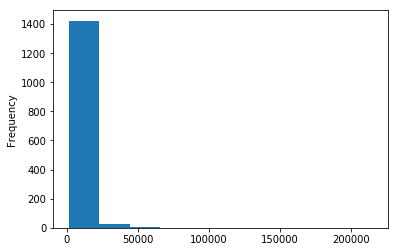

In [0]:
train_df['LotArea'].plot.hist()

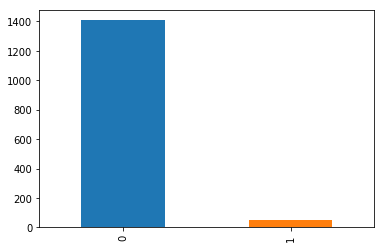

In [0]:
# element wise function to transform
train_df['area_above_20k'] = train_df['LotArea'].map(lambda x : 1 if x > 20000 else 0) 
train_df['area_above_20k'] = train_df['area_above_20k'].astype('category')
train_df['area_above_20k'].value_counts().plot.bar()

<a id='section5'></a> 
## **5. Model Prep**
- **`X`** usually refers to a **dataframe** of source data in which we will use to make a prediction. 
- **`y`** usually refers to the thing we are trying to predict, either money, or 1 / 0 if someone has a disease. 

In [0]:
y = train_df['SalePrice']
X = train_df.drop('SalePrice', axis=1)
X = pd.get_dummies(X)

## **Train Test Split: how to grade your model**

<img src='https://cdn-images-1.medium.com/max/948/1*4G__SV580CxFj78o9yUXuQ.png' width='400px'/>

- **`train`** will use this to find optimal models, can be checked for performance, but more for a gut-check and troubleshooting
- **`valid`** will use this dataset to determine the model's performance and robustness

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)


(1168, 2009) (292, 2009) (1168,) (292,)


<a id='section6'></a>
# **6. Modeling with Machine Learning**
<img src='https://www.lintao-dashboards.com/wp-content/uploads/2016/02/ldm930.jpg' style='width:400px' />


## ** Linear Regression** 
<img src='https://i.stack.imgur.com/SbqXz.png' style='width:400px' />

**Wikipedia:**  linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

**Caveat:** We are assuming that the relationship is linear. If we are modeling something like compound interest for a savings account, then fitting a linear model is not appropriate. 

### **Fitting a Linear Model**

In [0]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
lm.score(X_train,y_train)

1.0

In [0]:
lm.score(X_valid,y_valid)

0.8608849093758556

### **Fitting a RandomForest Regressor**


In [0]:
rfr = RandomForestRegressor(n_jobs=-1, n_estimators=100, max_features=0.5, )
rfr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
rfr.score(X_train,y_train)

0.9793076914730068

In [0]:
rfr.score(X_valid,y_valid)

0.9887445502302463

<a id='section7'></a>
## ** 7. Hyperparameter Optimization** 
> <img src='https://blogs.sas.com/content/subconsciousmusings/files/2016/09/patricks-hyperparameter-grid-search-smaller2.png' />

#### **Look at how many options are in  logistic regression:**
>        LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
>                  intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
>                 penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
>                  verbose=0, warm_start=False)


Many of the advanced machine learning functions have a large number of model options that can be entered. these are often called **hyper parameters**. These address questions such as: 
- "how long should the model run", or 
- "how many times should my computer re-look at the data" or 
- "how slow should the computer work through the problem?" 

To assist answering some of these questions, `sklearn` has `GridSearch` and `RandomizedSearch` which will try various combinations with a provided model, compare scores and return the optimal model that should be tried.

In [0]:
rfr = RandomForestRegressor(n_jobs=-1, n_estimators=100)

 #### ** Using GridSearch we can find the optimal parameters for Random forest **

In [0]:
params = {
    'max_features': [0.25, 0.5, 0.7],
    'max_depth' : [ 2,5,10, 20]
}
gs = GridSearchCV(cv=5, param_grid=params, estimator=rfr, verbose=0)
gs.fit(X_train,y_train.ravel())
print(gs.best_params_, gs.best_score_)

{'max_depth': 20, 'max_features': 0.5} 0.853513466312176
